In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [87]:
df_train_num = df_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
df_train_cat = df_train[['HomePlanet','CryoSleep','Cabin','Destination','VIP']]

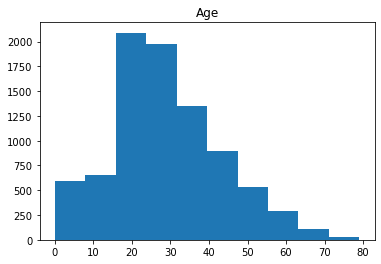

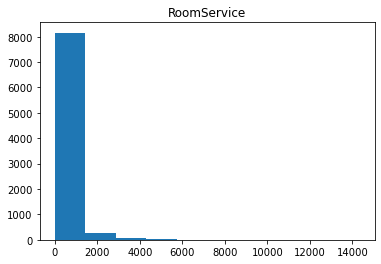

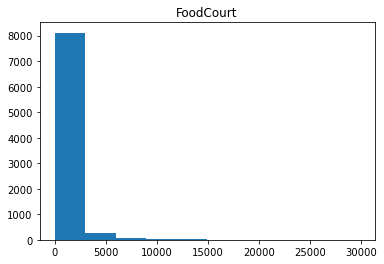

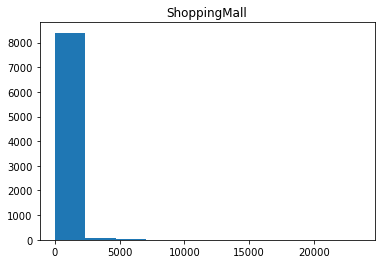

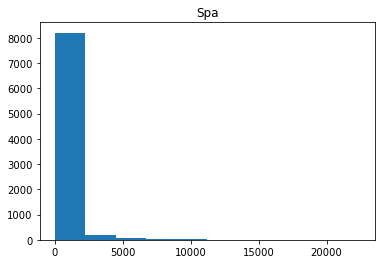

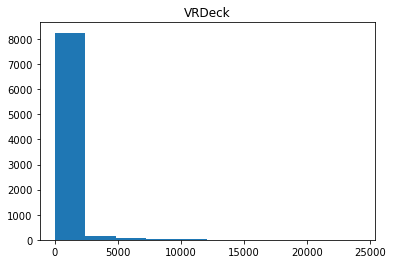

In [88]:
for i in df_train_num.columns:
    plt.hist(df_train_num[i])
    plt.title(i)
    plt.show()

Age is normally distributed so we can use mean to impute null values, but other features will be imputed using median as they are not normally distributed.

In [89]:
for i in df_train_cat.columns:
    print(df_train_cat[i].value_counts())
    print('\n')

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


False    5439
True     3037
Name: CryoSleep, dtype: int64


G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64


TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


False    8291
True      199
Name: VIP, dtype: int64




In [90]:
#break cabin into 3 categories
df_train['Cabin_1'] = df_train['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'N')
df_train['Cabin_2'] = df_train['Cabin'].apply(lambda x: str(x).split('/')[1] if pd.notna(x) else -1)
df_train['Cabin_3'] = df_train['Cabin'].apply(lambda x: str(x).split('/')[2] if pd.notna(x) else 'N')
df_train.drop(['Cabin'], axis=1, inplace=True)

In [91]:
df_train.dropna(subset=['HomePlanet', 'CryoSleep', 'Destination'], inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8103 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8103 non-null   object 
 1   HomePlanet    8103 non-null   object 
 2   CryoSleep     8103 non-null   object 
 3   Destination   8103 non-null   object 
 4   Age           7930 non-null   float64
 5   VIP           7913 non-null   object 
 6   RoomService   7933 non-null   float64
 7   FoodCourt     7931 non-null   float64
 8   ShoppingMall  7915 non-null   float64
 9   Spa           7930 non-null   float64
 10  VRDeck        7925 non-null   float64
 11  Name          7924 non-null   object 
 12  Transported   8103 non-null   bool   
 13  Cabin_1       8103 non-null   object 
 14  Cabin_2       8103 non-null   object 
 15  Cabin_3       8103 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1020.8+ KB


In [92]:
df_train['VIP'] = df_train['VIP'].fillna('False')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8103 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8103 non-null   object 
 1   HomePlanet    8103 non-null   object 
 2   CryoSleep     8103 non-null   object 
 3   Destination   8103 non-null   object 
 4   Age           7930 non-null   float64
 5   VIP           8103 non-null   object 
 6   RoomService   7933 non-null   float64
 7   FoodCourt     7931 non-null   float64
 8   ShoppingMall  7915 non-null   float64
 9   Spa           7930 non-null   float64
 10  VRDeck        7925 non-null   float64
 11  Name          7924 non-null   object 
 12  Transported   8103 non-null   bool   
 13  Cabin_1       8103 non-null   object 
 14  Cabin_2       8103 non-null   object 
 15  Cabin_3       8103 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1020.8+ KB


In [93]:
df_train = df_train.drop(['Name', 'PassengerId'], axis = 1)

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8103 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8103 non-null   object 
 1   CryoSleep     8103 non-null   object 
 2   Destination   8103 non-null   object 
 3   Age           7930 non-null   float64
 4   VIP           8103 non-null   object 
 5   RoomService   7933 non-null   float64
 6   FoodCourt     7931 non-null   float64
 7   ShoppingMall  7915 non-null   float64
 8   Spa           7930 non-null   float64
 9   VRDeck        7925 non-null   float64
 10  Transported   8103 non-null   bool   
 11  Cabin_1       8103 non-null   object 
 12  Cabin_2       8103 non-null   object 
 13  Cabin_3       8103 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 894.2+ KB


In [95]:
df_train['Age'] = df_train.Age.fillna(df_train.Age.mean())
df_train['RoomService'] = df_train.RoomService.fillna(df_train.RoomService.median())
df_train['FoodCourt'] = df_train.FoodCourt.fillna(df_train.FoodCourt.median())
df_train['ShoppingMall'] = df_train.ShoppingMall.fillna(df_train.ShoppingMall.median())
df_train['Spa'] = df_train.Spa.fillna(df_train.Spa.median())
df_train['VRDeck'] = df_train.VRDeck.fillna(df_train.VRDeck.median())

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8103 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8103 non-null   object 
 1   CryoSleep     8103 non-null   object 
 2   Destination   8103 non-null   object 
 3   Age           8103 non-null   float64
 4   VIP           8103 non-null   object 
 5   RoomService   8103 non-null   float64
 6   FoodCourt     8103 non-null   float64
 7   ShoppingMall  8103 non-null   float64
 8   Spa           8103 non-null   float64
 9   VRDeck        8103 non-null   float64
 10  Transported   8103 non-null   bool   
 11  Cabin_1       8103 non-null   object 
 12  Cabin_2       8103 non-null   object 
 13  Cabin_3       8103 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 894.2+ KB


In [97]:
df_train_X = pd.get_dummies(df_train[['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck','Cabin_1','Cabin_2','Cabin_3']])

In [98]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000
mean,28.823077,220.956683,455.652721,171.515982,306.232260,300.582377
std,14.359779,665.644004,1626.308976,607.477938,1126.839827,1148.043096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.500000,22.500000,54.500000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [99]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_train_scaled = df_train_X.copy()
df_train_scaled[['Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']] = scale.fit_transform(df_train_scaled[['Age', 'RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']])

In [100]:
df_train_scaled

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_2_993,Cabin_2_994,Cabin_2_995,Cabin_2_996,Cabin_2_997,Cabin_2_998,Cabin_2_999,Cabin_3_N,Cabin_3_P,Cabin_3_S
0,0.708754,-0.331965,-0.280193,-0.282359,-0.271779,-0.261838,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,-0.335895,-0.168203,-0.274659,-0.241202,0.215455,-0.223509,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2.031976,-0.267362,1.918787,-0.282359,5.687732,-0.219154,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.290895,-0.331965,0.508758,0.328401,2.682683,-0.093715,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,-0.893041,0.123262,-0.237148,-0.033774,0.229654,-0.260095,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.848041,-0.331965,3.912996,-0.282359,1.186371,-0.197376,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
8689,-0.753754,-0.331965,-0.280193,-0.282359,-0.271779,-0.261838,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8690,-0.196608,-0.331965,-0.280193,2.799425,-0.270891,-0.261838,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8691,0.221251,-0.331965,0.364865,-0.282359,0.041506,2.556175,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [102]:
X_train = df_train_scaled
y_train = df_train['Transported']

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [105]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.490438   0.51202961 0.48673658 0.49320988 0.47037037]
0.49055688837099487


In [106]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75879087 0.76866132 0.78963603 0.7882716  0.7845679 ]
0.7779855446645494


In [107]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.7458359  0.76619371 0.78531771 0.78888889 0.77962963]
0.7731731669979665


In [108]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.74768661 0.76927822 0.78716841 0.77222222 0.77716049]
0.7707031934257926


In [109]:
rf = RandomForestClassifier(random_state= 1)
cv = cross_val_score(rf, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.77421345 0.78593461 0.78655151 0.80802469 0.79938272]
0.790821395115041


In [110]:
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.77914867 0.79086983 0.79086983 0.80925926 0.80493827]
0.7950171742789468


In [111]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr), ('knn', knn), ('rf',rf),('gnb',gnb),('svc', svc)], voting = 'soft')
cv = cross_val_score(voting_clf, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.76866132 0.78223319 0.78901912 0.80555556 0.78888889]
0.7868716156007951


My code gives me around 77 - 79% of accuracy right now.

Earlier i tried to remove rows with null values in them now lets try imputing the data with maximum occurence.